In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
np.random.seed(100)
N = 10000 # number of data points

In [4]:
df = pd.DataFrame(np.random.randint(0,100,size=(N, 8)), columns=list('ABCDEFGH'))

In [5]:
df.head()

,A,B,C,D,E,F,G,H
0,8,24,67,87,79,48,10,94
1,52,98,53,66,98,14,34,24
2,15,60,58,16,9,93,86,2
3,27,4,31,1,13,83,4,91
4,59,67,7,49,47,65,61,14


In [6]:
t = np.linspace(0, 4*np.pi, N)
data = 15.0*np.sin(t+0.001) + 0.5 + np.random.randn(N) # create artificial data with noise
# data = 3.0*np.sin(t+100) 

In [7]:
df['target']=data +20
# len(df['A'])

In [8]:
def make_poly(date, degree):
    pass

In [9]:
df['A']=(25.0*np.sin(t+0.001) + 0.5 + np.random.randn(N))+30
df['B']=df['B']+(25.0*np.sin(t+0.001) + 0.5 + np.random.randn(N))+30
df['C']=df['C']+(25.0*np.sin(t+0.001) + 0.5 + np.random.randn(N))+30
df['D']=df['D']+(25.0*np.sin(t+0.001) + 0.5 + np.random.randn(N))+30
df['E']=df['E']+(25.0*np.sin(t+0.001) + 0.5 + np.random.randn(N))+30
df['F']=df['F']+(25.0*np.sin(t+0.001) + 0.5 + np.random.randn(N))+30
df['G']=df['G']+(25.0*np.sin(t+0.001) + 0.5 + np.random.randn(N))+30
df['H']=df['H']+(25.0*np.sin(t+0.001) + 0.5 + np.random.randn(N))+30


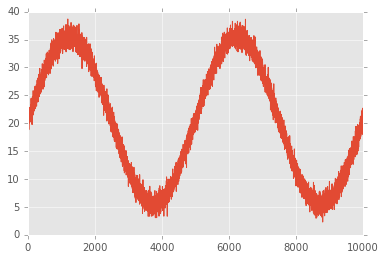

In [10]:
df['target'].plot()

In [11]:
df.head()

,A,B,C,D,E,F,G,H,target
0,31.084792,54.280600,99.606257,116.899194,109.528866,78.724891,39.971491,124.704883,19.722735
1,30.357058,129.335490,84.479174,96.278852,129.508894,45.504254,65.217745,53.503791,20.749521
2,30.723062,88.984993,88.592325,46.891401,40.075978,123.538610,117.819881,34.078082,21.634473
3,30.669397,34.489531,60.757485,32.560400,43.860465,112.540084,33.922024,120.418458,21.055577
4,29.325972,95.499055,38.261552,78.516679,77.379959,96.125619,92.681642,44.115223,18.345650


In [12]:
import h2o

In [13]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,5 hours 2 mins
H2O cluster version:,3.10.0.10
H2O cluster version age:,3 months and 12 days !!!
H2O cluster name:,H2O_from_python_user_cqqpff
H2O cluster total nodes:,1
H2O cluster free memory:,836 Mb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [14]:
hdf=h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [15]:
hdf_train, hdf_validate= hdf.split_frame(ratios=[0.75], seed=5010)

In [16]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [17]:
dl0_1 = H2ODeepLearningEstimator(seed =10,epochs =100,hidden=[2], model_id='dl0_1')
dl0_1.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [18]:
dl1 = H2ODeepLearningEstimator(seed =10,epochs =100,hidden=[5,5], model_id='dl1')
dl1.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [19]:
dl1_0 = H2ODeepLearningEstimator(seed =10,epochs =10,hidden=[5,5], model_id='dl1_0')
dl1_0.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [20]:
dl1_1 = H2ODeepLearningEstimator(seed =10,epochs =100,hidden=[5,5], model_id='dl1_1')
dl1_1.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [21]:
dl2 = H2ODeepLearningEstimator(seed =10,epochs =200,hidden=[15,15], model_id='dl2')
dl2.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [22]:
dl3 = H2ODeepLearningEstimator(seed =10,epochs =500,hidden=[30,30], model_id='dl3')
dl3.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [23]:
dl4 = H2ODeepLearningEstimator(seed =10,epochs =1000,hidden=[30,30,30], model_id='dl4')
dl4.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [24]:
dl5 = H2ODeepLearningEstimator(seed =10,epochs =1000,hidden=[60,60,60], model_id='dl5')
dl5.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [25]:
dl6 = H2ODeepLearningEstimator(seed =10,epochs =20000,hidden=[60,60,60], model_id='dl6')
dl6.train(x = hdf.columns[0:len(hdf.col_names)-1], y = 'target', training_frame=hdf_train, validation_frame=hdf_validate)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [26]:
print 'training error:', dl5.mse(train=True),';', dl6.mse(train=True)

training error: 1.7409381 ; 1.78644610143


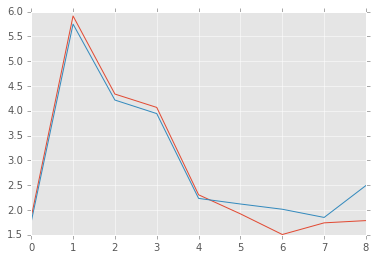

In [27]:
plt.plot([dl0_1.mse(train=True), dl1.mse(train=True), dl1_0.mse(train=True), dl1_1.mse(train=True), dl2.mse(train=True),
          dl3.mse(train=True),dl4.mse(train=True), dl5.mse(train=True), dl6.mse(train=True)])
plt.plot([dl0_1.mse(valid=True), dl1.mse(valid=True), dl1_0.mse(valid=True), dl1_1.mse(valid=True), dl2.mse(valid=True), 
          dl3.mse(valid=True), dl4.mse(valid=True), dl5.mse(valid=True), dl6.mse(valid=True)])

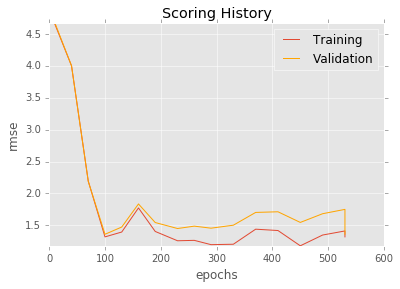

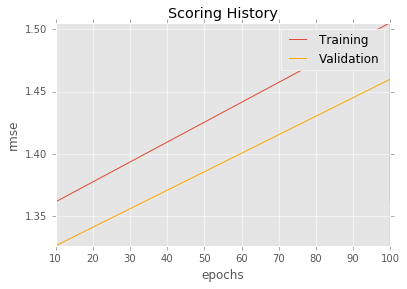

In [28]:
dl5.plot()
dl0_1.plot()

deeplearning prediction progress: |███████████████████████████████████████| 100%


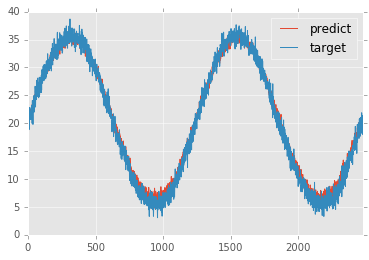

In [29]:
prediction= dl0_1.predict(hdf_validate)

prediction['target']=hdf_validate['target']
output= prediction.as_data_frame()
output.plot()

deeplearning prediction progress: |███████████████████████████████████████| 100%


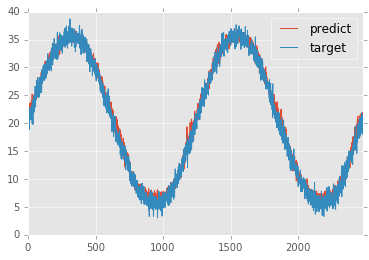

In [30]:
prediction= dl5.predict(hdf_validate)

prediction['target']=hdf_validate['target']
output= prediction.as_data_frame()
output.plot()

deeplearning prediction progress: |███████████████████████████████████████| 100%


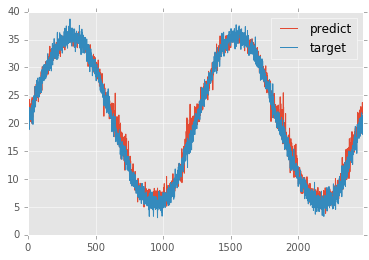

In [31]:
prediction= dl6.predict(hdf_validate)

prediction['target']=hdf_validate['target']
output= prediction.as_data_frame()
output.plot()